In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.utils import shuffle

In [ ]:
# Load the dataset, setting the first column as the index
df = pd.read_csv("/content/sample_data/Lung_gene_expression (1).csv", index_col=0) # Use index_col=0

print(df.columns)

# Split into features and target
X = df.iloc[:, :-1]  # All columns except the last
y = df.iloc[:, -1]   # Last colum

# Drop rows with missing values in the target variable
# This will remove corresponding rows from both X and y
data = pd.concat([X, y], axis=1).dropna(subset=[y.name])
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso logistic regression
#model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
#model.fit(X_train, y_train)

# Get coefficients and select features with non-zero coefficients
#coef = model.coef_[0]
#selected_features = X.columns[coef != 0]

########
RFE


# Load dataset


# Initialize the model
model = LogisticRegression(max_iter=1000)

# Initialize RFE and select top 2 features
rfe = RFE(estimator=model, n_features_to_select=2)
rfe.fit(X_train, y_train)

# Print results
print("Selected Features (True = selected):")
print(rfe.support_)
print("\nFeature Ranking (1 = most important):")
print(rfe.ranking_)

# Optional: Display feature names with selection info
selected_features = X.columns[rfe.support_]
######################

# Output the selected features
print("Selected features:\n", selected_features)

# Create reduced DataFrames with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]




    # Train Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=2,random_state=42, n_jobs=-1)
rf_clf.fit(X_train_selected, y_train)



    # Make predictions
#y_pred = rf_clf.predict(X_test_selected)

svm_model = SVC(kernel='linear', C=1.0)  # You can change kernel to 'rbf', 'poly', etc.
svm_model.fit(X_train_selected, y_train)

# 5. Make predictions and evaluate
#y_pred = svm_model.predict(X_test_selected)




# 4. Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warning appears
logreg.fit(X_train_selected, y_train)

# 5. Make predictions
y_pred = logreg.predict(X_test_selected)

# Predict and evaluate

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_model, X, y, cv=5)
print("Cross-validation accuracy scores:", scores)
print("Mean CV accuracy:", scores.mean())

Index(['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'FIRRM', 'FGR', 'CFH', 'FUCA2',
       'GCLC', 'NFYA',
       ...
       'SNORA74C-2', 'ELOA3BP', 'NPBWR1', 'ELOA3DP', 'PDCD6-AHRR', 'LNCDAT',
       'LOC124902537', 'RNF228', 'PANO1', 'classes'],
      dtype='object', length=31506)


In [ ]:
# metabric

import pandas as pd
# Load expression data and clinical labels
#expr_df = pd.read_csv("/content/sample_data/METABRIC_expression.csv")
clinical_df = pd.read_csv("/content/sample_data/metabric_clinical.csv")  # should include Sample_ID, Label
clinical_df.set_index('Sample_ID', inplace=True)

# Match samples
common_ids = expr_df.index.intersection(clinical_df.index)
expr_df = expr_df.loc[common_ids]
labels = clinical_df.loc[common_ids, 'Label']

In [ ]:
#Survival analysis
!pip install lifelines
import pandas as pd
from lifelines import KaplanMeierFitter, CoxPHFitter
import matplotlib.pyplot as plt

# Load expression and clinical data

expression = pd.read_csv("METABROIC_expression.csv", index_col=0)  # rows = genes, cols = samples
clinical = pd.read_csv("metabric_clinical.csv")  # sample_id, OS_time, OS_event

# Transpose expression and keep biomarker genes
expression = expression.T
biomarkers = ['11096', '8436', '4320', '286133', '1958']  # Entrez IDs
expression = expression[biomarkers]
expression.columns = ['ADAMTS5', 'CAVIN2', 'MMP11', 'SCARA5', 'EGR1']

# Match samples
expression['sample_id'] = expression.index.str[:15]  # Normalize
merged = pd.merge(clinical, expression, on='sample_id')

# Cox model
cph = CoxPHFitter()
cox_data = merged[['OS_time', 'OS_event', 'ADAMTS5', 'CAVIN2', 'MMP11', 'SCARA5', 'EGR1']].dropna()
cph.fit(cox_data, duration_col='OS_time', event_col='OS_event')
cph.print_summary()

FileNotFoundError: [Errno 2] No such file or directory: 'METABROIC_expression.csv'

In [ ]:
# Load the dataset
df = pd.read_csv("Lung_gene_expression.csv", index_col="Unnamed: 0")

print(df.columns)

# Encode the target variable
le = LabelEncoder()
df["classes"] = le.fit_transform(df["classes"])  # Convert categorical labels to 0 and 1

# Define features and target
X = df.drop(columns=["classes"])
y = df["classes"]

# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

FileNotFoundError: [Errno 2] No such file or directory: 'Lung_gene_expression.csv'

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df = df.iloc[:,1:]

In [ ]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# 4. Get feature importances

feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for importances
importance_df = pd.DataFrame({
    'Gene': feature_names,
    'Importance': feature_importances
})

# ---------------------------
# 5. Select Top 1000 Genes
# ---------------------------
top_genes_df = importance_df.sort_values(by='Importance', ascending=False).head(1000)

# Optional: Save to CSV
top_genes_df.to_csv('top_1000_genes.csv', index=False)

# ---------------------------
# DONE!
# ---------------------------
print("Top 1000 genes saved to 'top_1000_genes.csv'")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:04:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Top 1000 genes saved to 'top_1000_genes.csv'


In [ ]:
#XGB + LR
# Train XGBoost to get feature importances
from xgboost import XGBClassifier # Import XGBClassifier
from sklearn.preprocessing import StandardScaler
xgb_selector = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6,
                             subsample=0.8, colsample_bytree=0.8, random_state=42,
                             use_label_encoder=False, eval_metric="logloss")

xgb_selector.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(xgb_selector.feature_importances_, index=X.columns)

# List of feature selection counts
feature_counts = [500]

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=["Features", "AUC", "Accuracy", "Precision", "Kappa"])

# Loop through different feature counts
for num_features in feature_counts:
    # Select top N features
    top_features = feature_importances.nlargest(num_features).index.tolist()

    # Filter dataset with selected features
    X_train_selected = X_train[top_features]
    X_test_selected = X_test[top_features]

    # Standardize the features (important for Logistic Regression)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_selected)
    X_test_scaled = scaler.transform(X_test_selected)

    # Train Logistic Regression classifier
    lr_clf = LogisticRegression(solver="liblinear", C=1.0, random_state=42)
    lr_clf.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = lr_clf.predict(X_test_scaled)
    y_pred_proba = lr_clf.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for AUC calculation

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    kappa = cohen_kappa_score(y_test, y_pred)

    # Store results in DataFrame
    results_df = pd.concat([results_df, pd.DataFrame([[num_features, auc, accuracy, precision, kappa]],
                                                      columns=["Features", "AUC", "Accuracy", "Precision", "Kappa"])],
                                                      ignore_index=True)

# Display final results
print(results_df)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:51:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  Features       AUC  Accuracy  Precision     Kappa
0      500  0.996537  0.988166   0.882353  0.930992


<ipython-input-28-d25230b1b4be>:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([[num_features, auc, accuracy, precision, kappa]],


In [ ]:
#XGB + RF
# Train XGBoost to get feature importances
from xgboost import XGBClassifier # Import XGBClassifier
from sklearn.preprocessing import StandardScaler
xgb_selector = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6,
                             subsample=0.8, colsample_bytree=0.8, random_state=42,
                             use_label_encoder=False, eval_metric="logloss")

xgb_selector.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(xgb_selector.feature_importances_, index=X.columns)

# List of feature selection counts
feature_counts = [500]

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=["Features", "AUC", "Accuracy", "Precision", "Kappa"])

# Loop through different feature counts
for num_features in feature_counts:
    # Select top N features
    top_features = feature_importances.nlargest(num_features).index.tolist()

    # Filter dataset with selected features
    X_train_selected = X_train[top_features]
    X_test_selected = X_test[top_features]

    # Train Random Forest classifier
    rf_clf = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=2,
                                    random_state=42, n_jobs=-1)
    rf_clf.fit(X_train_selected, y_train)

    # Make predictions
    y_pred = rf_clf.predict(X_test_selected)
    y_pred_proba = rf_clf.predict_proba(X_test_selected)[:, 1]  # Probability estimates for AUC calculation

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    kappa = cohen_kappa_score(y_test, y_pred)

    # Store results in DataFrame
    results_df = pd.concat([results_df, pd.DataFrame([[num_features, auc, accuracy, precision, kappa]],
                                                      columns=["Features", "AUC", "Accuracy", "Precision", "Kappa"])],
                                                      ignore_index=True)

# Display final results
print(results_df)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:04:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  Features       AUC  Accuracy  Precision     Kappa
0      500  0.994805  0.982249   0.928571  0.886856


<ipython-input-27-2f34a473e09e>:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([[num_features, auc, accuracy, precision, kappa]],


In [ ]:
!pip install SHAP

In [ ]:
import shap

In [ ]:
explainer = shap.LinearExplainer(lr_clf, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)
cols=X_test_selected
cols=cols.columns.tolist()
pd.DataFrame(shap_values, columns=cols).head(5)

,ANLN,CLEC3B,SLC39A8,FOLR1,C13orf46,ASPA,CLDN18,AQP4,MYBL2,ARHGAP44,...,SH2D2A,VRK2,TNFRSF1B,VEZT,POU2F2,BRD9,SNX1,TBPL1,BMAL2,BCLAF1
0,1.352605,0.137271,0.055939,0.078556,-0.001892,-0.040596,-0.025184,-0.096134,0.846079,0.009052,...,-0.016071,-0.015394,-0.013018,-0.003451,0.023426,-0.017999,0.036815,-0.045264,0.331517,0.023665
1,0.171756,0.051343,0.033170,0.040199,-0.001324,-0.011812,-0.016139,-0.084857,-0.171309,0.005063,...,-0.070893,-0.008062,-0.007477,0.002631,0.001389,0.040806,-0.003937,-0.064182,0.165971,0.012821
2,0.023392,-0.037916,-0.013170,-0.102187,0.000867,0.027466,0.015325,0.128992,-0.032282,-0.006337,...,-0.052773,0.014064,-0.005959,0.001657,0.012433,-0.071454,-0.025613,0.039447,0.036130,0.002634
3,-0.011106,-0.035362,-0.002903,-0.013106,0.000381,0.003265,0.008632,0.020695,0.031437,-0.001652,...,0.005491,0.002050,-0.003361,-0.015664,0.055565,-0.024050,0.002846,-0.021436,-0.194409,0.015818
4,0.743710,0.103948,0.032888,0.048500,-0.001274,-0.032195,-0.018695,-0.070857,0.514368,0.004918,...,-0.014195,-0.018636,-0.016255,0.012575,0.066429,-0.079902,0.007060,-0.105676,0.212541,-0.026856


In [ ]:
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X_test_selected)


In [ ]:
import pandas as pd
import numpy as np
shap_values_reshaped = shap_values.reshape(-1, shap_values.shape[1])
# Calculate mean absolute values across samples and classes
mean_abs_shap = np.abs(shap_values_reshaped).mean(axis=0)
#mean_abs_shap = np.abs(shap_values[1]).mean(axis=0)

# Step 2: Create a DataFrame for easy viewing
shap_importance = pd.DataFrame({
    'feature': X_test_selected.columns,
    'mean_abs_shap': mean_abs_shap
})

# Step 3: Sort and get top 20
top_20 = shap_importance.sort_values(by='mean_abs_shap', ascending=False).head(20)

# Display top 20 features
print(top_20)

     feature  mean_abs_shap
13     TNNC1       0.004481
12     SFTPC       0.004481
2    SLC39A8       0.003109
3      FOLR1       0.003109
18  CACNA2D2       0.003062
19     HYAL1       0.003062
33    TSPAN6       0.003033
32      DLX6       0.003033
25      FHL1       0.003009
24    ADGRF5       0.003009
40      GCLC       0.002544
41      NFYA       0.002544
43    NIPAL3       0.002431
42     STPG1       0.002431
22    KIF18B       0.002360
23     CLIC5       0.002360
4   C13orf46       0.002357
5       ASPA       0.002357
31  B4GALNT4       0.002330
30     ERBB4       0.002330


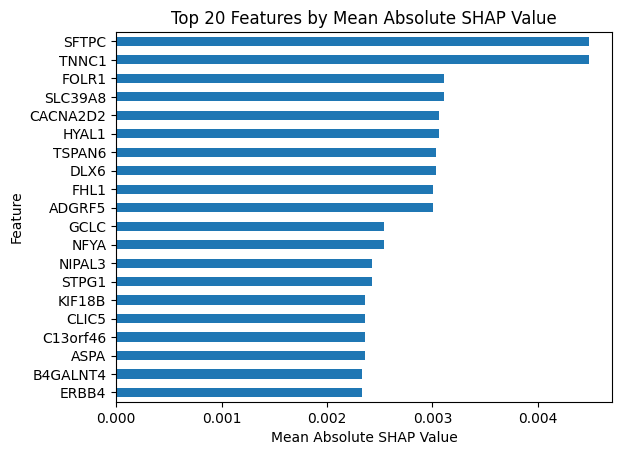

In [ ]:
import matplotlib.pyplot as plt
top_20.sort_values(by='mean_abs_shap', ascending=True, inplace=True)
top_20.plot(kind='barh', x='feature', y='mean_abs_shap', legend=False)
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Feature')
plt.title('Top 20 Features by Mean Absolute SHAP Value')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
# Gastric Cancer
# Load the dataset
df = pd.read_csv("trial_dataframe.csv") # Added parameters to handle errors and enforce engine
# Encode the target variable
le = LabelEncoder()
df["Sample_Characteristics"] = le.fit_transform(df["Sample_Characteristics"])

# # Define features and target
X = df.drop(columns=["Sample_Characteristics"])
#, "Unnamed: 0"

y = df["Sample_Characteristics"]

# # Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.dropna()

,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,...,V58727,V58728,V58729,H2AQ1P,NBEAP6,V58732,V58733,V58734,V58735,Sample_Characteristics
0,2,821,323,92,1152,3575,1574,1215,590,150,...,0,0,0,0,0,3,0,0,1,0
1,0,703,302,119,334,11342,1616,1268,477,192,...,0,0,0,0,0,3,0,0,2,0
2,2,741,268,138,247,1558,1458,1044,542,124,...,0,1,0,0,0,5,0,0,0,0
3,0,422,300,79,164,1434,1386,1384,476,179,...,0,1,0,0,0,2,0,0,0,0
4,5,515,283,118,486,1485,1620,901,506,235,...,0,0,0,0,0,4,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,11,642,295,72,286,1742,741,1084,497,204,...,0,0,0,0,0,16,0,0,0,1
457,5,576,347,97,124,3039,721,1380,582,103,...,0,0,0,0,0,2,0,0,0,1
458,0,587,333,48,112,1473,1349,1304,378,192,...,0,0,0,0,0,2,0,0,0,1
459,1,685,252,86,577,1490,588,810,522,174,...,0,0,0,0,0,3,0,0,0,1


In [ ]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# 4. Get feature importances

feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for importances
importance_df = pd.DataFrame({
    'Gene': feature_names,
    'Importance': feature_importances
})

# ---------------------------
# 5. Select Top 1000 Genes
# ---------------------------
top_genes_df = importance_df.sort_values(by='Importance', ascending=False).head(1000)

# Optional: Save to CSV
top_genes_df.to_csv('top_1000_genes.csv', index=False)

# ---------------------------
# DONE!
# ---------------------------
print("Top 1000 genes saved to 'top_1000_genes.csv'")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Top 1000 genes saved to 'top_1000_genes.csv'


In [ ]:
#XGB + LR
# Train XGBoost to get feature importances
from xgboost import XGBClassifier # Import XGBClassifier
from sklearn.preprocessing import StandardScaler
xgb_selector = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6,
                             subsample=0.8, colsample_bytree=0.8, random_state=42,
                             use_label_encoder=False, eval_metric="logloss")

xgb_selector.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(xgb_selector.feature_importances_, index=X.columns)

# List of feature selection counts
feature_counts = [500]

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=["Features", "AUC", "Accuracy", "Precision", "Kappa"])

# Loop through different feature counts
for num_features in feature_counts:
    # Select top N features
    top_features = feature_importances.nlargest(num_features).index.tolist()

    # Filter dataset with selected features
    X_train_selected = X_train[top_features]
    X_test_selected = X_test[top_features]

    # Standardize the features (important for Logistic Regression)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_selected)
    X_test_scaled = scaler.transform(X_test_selected)

    # Train Logistic Regression classifier
    lr_clf = LogisticRegression(solver="liblinear", C=1.0, random_state=42)
    lr_clf.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = lr_clf.predict(X_test_scaled)
    y_pred_proba = lr_clf.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for AUC calculation

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    kappa = cohen_kappa_score(y_test, y_pred)

    # Store results in DataFrame
    results_df = pd.concat([results_df, pd.DataFrame([[num_features, auc, accuracy, precision, kappa]],
                                                      columns=["Features", "AUC", "Accuracy", "Precision", "Kappa"])],
                                                      ignore_index=True)

# Display final results
print(results_df)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:12:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  Features       AUC  Accuracy  Precision     Kappa
0      500  0.977226  0.920863   0.902778  0.841768


<ipython-input-40-d25230b1b4be>:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([[num_features, auc, accuracy, precision, kappa]],


In [ ]:
#XGB + RF
# Train XGBoost to get feature importances
from xgboost import XGBClassifier # Import XGBClassifier
from sklearn.preprocessing import StandardScaler
xgb_selector = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6,
                             subsample=0.8, colsample_bytree=0.8, random_state=42,
                             use_label_encoder=False, eval_metric="logloss")

xgb_selector.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(xgb_selector.feature_importances_, index=X.columns)

# List of feature selection counts
feature_counts = [500]

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=["Features", "AUC", "Accuracy", "Precision", "Kappa"])

# Loop through different feature counts
for num_features in feature_counts:
    # Select top N features
    top_features = feature_importances.nlargest(num_features).index.tolist()

    # Filter dataset with selected features
    X_train_selected = X_train[top_features]
    X_test_selected = X_test[top_features]

    # Train Random Forest classifier
    rf_clf = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=2,
                                    random_state=42, n_jobs=-1)
    rf_clf.fit(X_train_selected, y_train)

    # Make predictions
    y_pred = rf_clf.predict(X_test_selected)
    y_pred_proba = rf_clf.predict_proba(X_test_selected)[:, 1]  # Probability estimates for AUC calculation

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    kappa = cohen_kappa_score(y_test, y_pred)

    # Store results in DataFrame
    results_df = pd.concat([results_df, pd.DataFrame([[num_features, auc, accuracy, precision, kappa]],
                                                      columns=["Features", "AUC", "Accuracy", "Precision", "Kappa"])],
                                                      ignore_index=True)

# Display final results
print(results_df)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:28:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  Features       AUC  Accuracy  Precision     Kappa
0      500  0.987578   0.94964   0.955882  0.899265


<ipython-input-8-2f34a473e09e>:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([[num_features, auc, accuracy, precision, kappa]],


In [ ]:
!pip install SHAP

In [ ]:
import shap
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X_test_selected)

In [ ]:
import pandas as pd
import numpy as np
shap_values_reshaped = shap_values.reshape(-1, shap_values.shape[1])
# Calculate mean absolute values across samples and classes
mean_abs_shap = np.abs(shap_values_reshaped).mean(axis=0)
#mean_abs_shap = np.abs(shap_values[1]).mean(axis=0)

# Step 2: Create a DataFrame for easy viewing
shap_importance = pd.DataFrame({
    'feature': X_test_selected.columns,
    'mean_abs_shap': mean_abs_shap
})

# Step 3: Sort and get top 20
top_20 = shap_importance.sort_values(by='mean_abs_shap', ascending=False).head(20)

# Display top 20 features
print(top_20)

       feature  mean_abs_shap
59       KCNA3       0.009806
58     DUXAP10       0.009806
41      V44612       0.008737
40      V43432       0.008737
15       TREM2       0.008444
14     EXOC3L2       0.008444
2     ADAMTS18       0.008188
3        CLDN1       0.008188
86       VNN3P       0.007943
87   KRTAP16-1       0.007943
1         CBX2       0.007734
0          PGF       0.007734
46       ATG9B       0.007393
47   LINC01081       0.007393
7        FOXS1       0.006751
6        PYCR3       0.006751
4       POLR1B       0.006454
5        PUS7L       0.006454
151       GJA4       0.005798
150    MARCHF2       0.005798


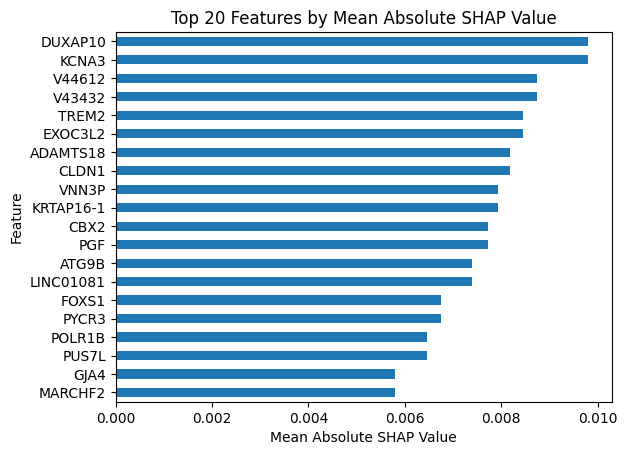

In [ ]:
import matplotlib.pyplot as plt
top_20.sort_values(by='mean_abs_shap', ascending=True, inplace=True)
top_20.plot(kind='barh', x='feature', y='mean_abs_shap', legend=False)
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Feature')
plt.title('Top 20 Features by Mean Absolute SHAP Value')
plt.show()

In [ ]:
# Load the dataset
df = pd.read_csv("BRCA_gene_expression.csv", index_col="Unnamed: 0")

print(df.columns)

# Encode the target variable
le = LabelEncoder()
df["classes"] = le.fit_transform(df["classes"])  # Convert categorical labels to 0 and 1

# Define features and target
X = df.drop(columns=["classes"])
y = df["classes"]

# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Index(['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'FIRRM', 'FGR', 'CFH', 'FUCA2',
       'GCLC', 'NFYA',
       ...
       'C8orf44-SGK3', 'SNORA74C-2', 'ELOA3BP', 'NPBWR1', 'ELOA3DP', 'LNCDAT',
       'LOC124902537', 'RNF228', 'PANO1', 'classes'],
      dtype='object', length=31575)


In [ ]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# 4. Get feature importances

feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for importances
importance_df = pd.DataFrame({
    'Gene': feature_names,
    'Importance': feature_importances
})

# ---------------------------
# 5. Select Top 1000 Genes
# ---------------------------
top_genes_df = importance_df.sort_values(by='Importance', ascending=False).head(1000)

# Optional: Save to CSV
top_genes_df.to_csv('top_1000_genes.csv', index=False)

# ---------------------------
# DONE!
# ---------------------------
print("Top 1000 genes saved to 'top_1000_genes.csv'")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:48:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Top 1000 genes saved to 'top_1000_genes.csv'


In [ ]:
#XGB + LR
# Train XGBoost to get feature importances
from xgboost import XGBClassifier # Import XGBClassifier
from sklearn.preprocessing import StandardScaler
xgb_selector = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6,
                             subsample=0.8, colsample_bytree=0.8, random_state=42,
                             use_label_encoder=False, eval_metric="logloss")

xgb_selector.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(xgb_selector.feature_importances_, index=X.columns)

# List of feature selection counts
feature_counts = [500]

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=["Features", "AUC", "Accuracy", "Precision", "Kappa"])

# Loop through different feature counts
for num_features in feature_counts:
    # Select top N features
    top_features = feature_importances.nlargest(num_features).index.tolist()

    # Filter dataset with selected features
    X_train_selected = X_train[top_features]
    X_test_selected = X_test[top_features]

    # Standardize the features (important for Logistic Regression)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_selected)
    X_test_scaled = scaler.transform(X_test_selected)

    # Train Logistic Regression classifier
    lr_clf = LogisticRegression(solver="liblinear", C=1.0, random_state=42)
    lr_clf.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = lr_clf.predict(X_test_scaled)
    y_pred_proba = lr_clf.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for AUC calculation

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    kappa = cohen_kappa_score(y_test, y_pred)

    # Store results in DataFrame
    results_df = pd.concat([results_df, pd.DataFrame([[num_features, auc, accuracy, precision, kappa]],
                                                      columns=["Features", "AUC", "Accuracy", "Precision", "Kappa"])],
                                                      ignore_index=True)

# Display final results
print(results_df)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:35:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  Features       AUC  Accuracy  Precision     Kappa
0      500  0.998503  0.991848   0.918919  0.953244


<ipython-input-48-d25230b1b4be>:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([[num_features, auc, accuracy, precision, kappa]],


In [ ]:
#XGB + RF
# Train XGBoost to get feature importances
from xgboost import XGBClassifier # Import XGBClassifier
from sklearn.preprocessing import StandardScaler
xgb_selector = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6,
                             subsample=0.8, colsample_bytree=0.8, random_state=42,
                             use_label_encoder=False, eval_metric="logloss")

xgb_selector.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(xgb_selector.feature_importances_, index=X.columns)

# List of feature selection counts
feature_counts = [500]

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=["Features", "AUC", "Accuracy", "Precision", "Kappa"])

# Loop through different feature counts
for num_features in feature_counts:
    # Select top N features
    top_features = feature_importances.nlargest(num_features).index.tolist()

    # Filter dataset with selected features
    X_train_selected = X_train[top_features]
    X_test_selected = X_test[top_features]

    # Train Random Forest classifier
    rf_clf = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=2,
                                    random_state=42, n_jobs=-1)
    rf_clf.fit(X_train_selected, y_train)

    # Make predictions
    y_pred = rf_clf.predict(X_test_selected)
    y_pred_proba = rf_clf.predict_proba(X_test_selected)[:, 1]  # Probability estimates for AUC calculation

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    kappa = cohen_kappa_score(y_test, y_pred)

    # Store results in DataFrame
    results_df = pd.concat([results_df, pd.DataFrame([[num_features, auc, accuracy, precision, kappa]],
                                                      columns=["Features", "AUC", "Accuracy", "Precision", "Kappa"])],
                                                      ignore_index=True)

# Display final results
print(results_df)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  Features      AUC  Accuracy  Precision     Kappa
0      500  0.99639  0.983696     0.9375  0.900145


<ipython-input-19-2f34a473e09e>:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([[num_features, auc, accuracy, precision, kappa]],


In [ ]:
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X_test_selected)

In [ ]:
import pandas as pd
import numpy as np
shap_values_reshaped = shap_values.reshape(-1, shap_values.shape[1])
# Calculate mean absolute values across samples and classes
mean_abs_shap = np.abs(shap_values_reshaped).mean(axis=0)
#mean_abs_shap = np.abs(shap_values[1]).mean(axis=0)

# Step 2: Create a DataFrame for easy viewing
shap_importance = pd.DataFrame({
    'feature': X_test_selected.columns,
    'mean_abs_shap': mean_abs_shap
})

# Step 3: Sort and get top 20
top_20 = shap_importance.sort_values(by='mean_abs_shap', ascending=False).head(20)

# Display top 20 features
print(top_20)

         feature  mean_abs_shap
2         SCARA5       0.004210
3        CD300LG       0.004210
14          DPM1       0.003541
15         HAGHL       0.003541
1         CAVIN2       0.003456
0        ADAMTS5       0.003456
4   LOC107984270       0.003425
5        TMEM220       0.003425
6          GIPC2       0.003289
7          MMP11       0.003289
62         GLP2R       0.003024
63         NKAPL       0.003024
8           EGR1       0.002889
9           TNMD       0.002889
56       HEPACAM       0.002821
57         ALDOC       0.002821
36     LINC00922       0.002645
37         ADRB2       0.002645
80      PAFAH1B3       0.002539
81     LOC645853       0.002539


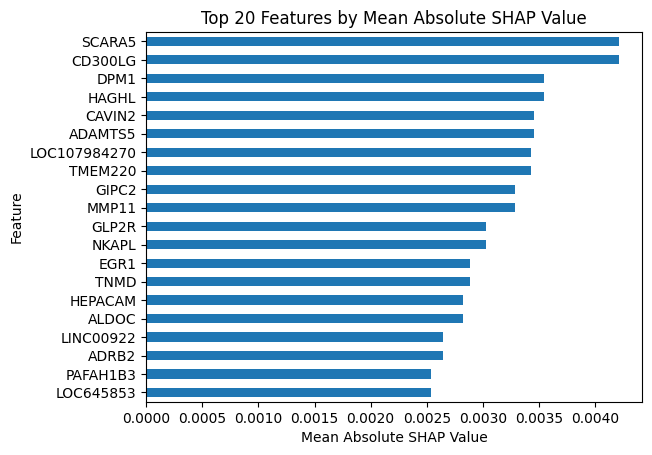

In [ ]:
import matplotlib.pyplot as plt
top_20.sort_values(by='mean_abs_shap', ascending=True, inplace=True)
top_20.plot(kind='barh', x='feature', y='mean_abs_shap', legend=False)
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Feature')
plt.title('Top 20 Features by Mean Absolute SHAP Value')
plt.show()